In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = "unguided_lda_dominant_topic_classification.xlsx"
df = pd.read_excel(file_name)

In [3]:
df.head()

,article_id,newspaper_name,edition,date,page,headline,byline,article,text_for_analysis,prepared_text,year,month,day,dominant_topic
0,1_1960-11-10_p36_sn83045462_00280608075_196011...,Evening star.,1,1960-11-10,p36,"Dark Names Lockmon ,\njansen Giont Coaches",NaN,SAN FRANCISCO. Nov. 10\n(AP).-Alvin Dark made ...,"Dark Names Lockmon ,\njansen Giont Coaches SAN...",dark name lockmon jansen giont coach san franc...,1960,11,10,0
1,2_1960-11-10_p36_sn83045462_00280608075_196011...,Evening star.,1,1960-11-10,p36,FALONEY FIGURES IN SWAP\n\n\nEtcheverry Deal R...,NaN,head last Saturday when Mon\ntreal lost in q c...,FALONEY FIGURES IN SWAP\n\n\nEtcheverry Deal R...,faloney figure swap etcheverry deal rock conod...,1960,11,10,0
2,3_1960-11-10_p36_sn83045462_00280608075_196011...,Evening star.,1,1960-11-10,p36,Home Ice Helps\nChicago to Gain\nLead in Leoque,BY the Associated Press,There's just no place like\nhome as far as the...,Home Ice Helps\nChicago to Gain\nLead in Leoqu...,home ice help chicago gain lead leoque there p...,1960,11,10,0
3,4_1960-11-10_p36_sn83045462_00280608075_196011...,Evening star.,1,1960-11-10,p36,Chamberlain\nFires In 4o\nAgainst LA,b the Associated rfess,Wilt Chamberlain keeps on\nscoring baskets and...,Chamberlain\nFires In 4o\nAgainst LA Wilt Cham...,chamberlain fire 4o la wilt chamberlain keep s...,1960,11,10,0
4,5_1960-11-10_p36_sn83045462_00280608075_196011...,Evening star.,1,1960-11-10,p36,NaN,NaN,raped a home run the first\ntime he faced a ma...,raped a home run the first\ntime he faced a m...,raped home run first time faced major league p...,1960,11,10,0


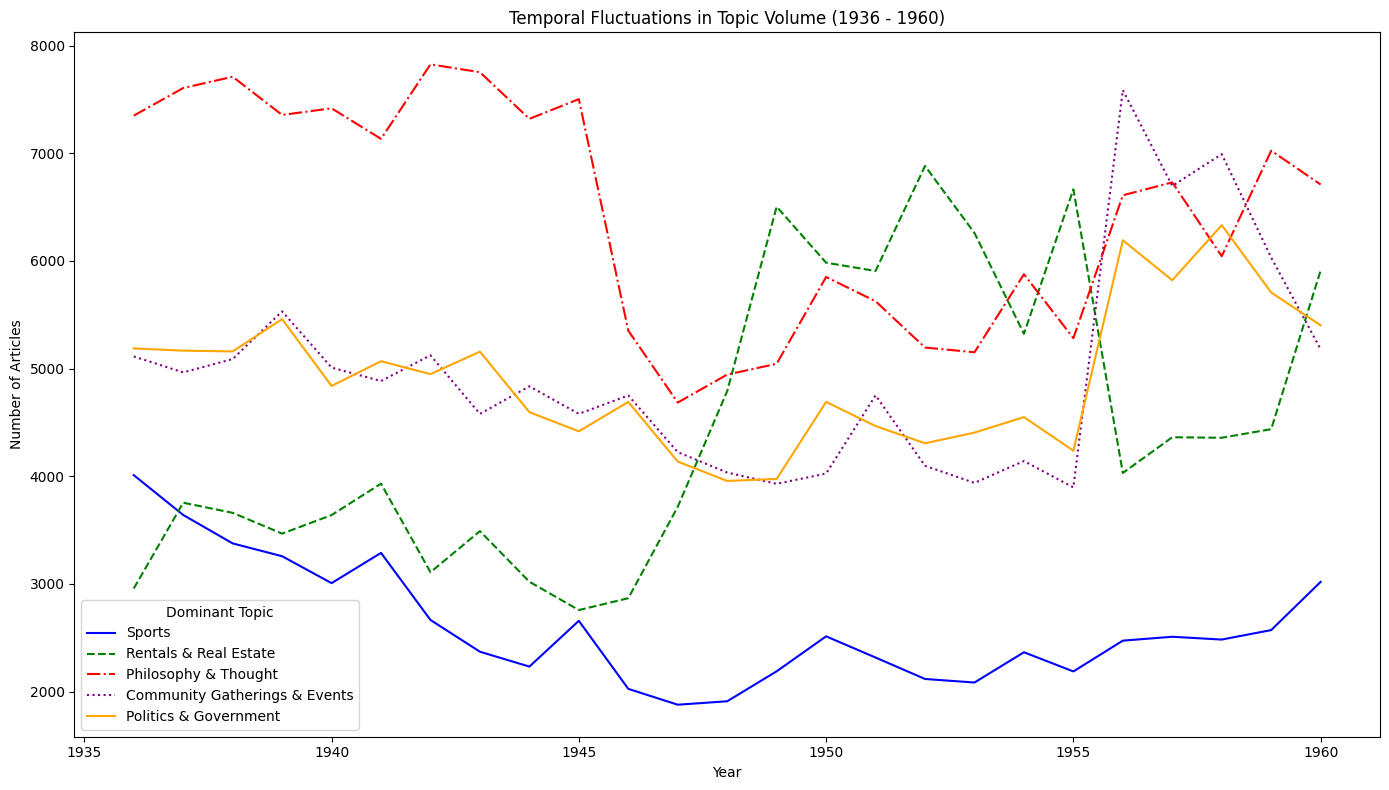

In [9]:
# Mapping numeric topics to names
topic_names = {
    0: 'Sports',
    1: 'Rentals & Real Estate',
    2: 'Philosophy & Thought',
    3: 'Community Gatherings & Events',
    4: 'Politics & Government'
}

df['dominant_topic'] = df['dominant_topic'].map(topic_names)

# Group by year and dominant topic to count the number of articles per topic per year
topic_volume_by_year = df.groupby(['year', 'dominant_topic']).size().reset_index(name='count')

# Pivot the data to have years as rows, topics as columns, and counts as values
topic_volume_pivot = topic_volume_by_year.pivot(index='year', columns='dominant_topic', values='count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))

# Defining custom styles for each topic
topic_styles = {
    'Sports': {"color": "blue", "linestyle": "-"},
    'Rentals & Real Estate': {"color": "green", "linestyle": "--"},
    'Philosophy & Thought': {"color": "red", "linestyle": "-."},
    'Community Gatherings & Events': {"color": "purple", "linestyle": ":"},
    'Politics & Government': {"color": "orange", "linestyle": "-"}
}

# Creating a lineplot for each topic with specified styles
for topic, style in topic_styles.items():
    sns.lineplot(data=topic_volume_pivot[topic], label=topic, **style)

# Adding titles and labels
plt.title('Temporal Fluctuations in Topic Volume (1936 - 1960)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

plt.legend(title='Dominant Topic')
plt.tight_layout()
plt.show()

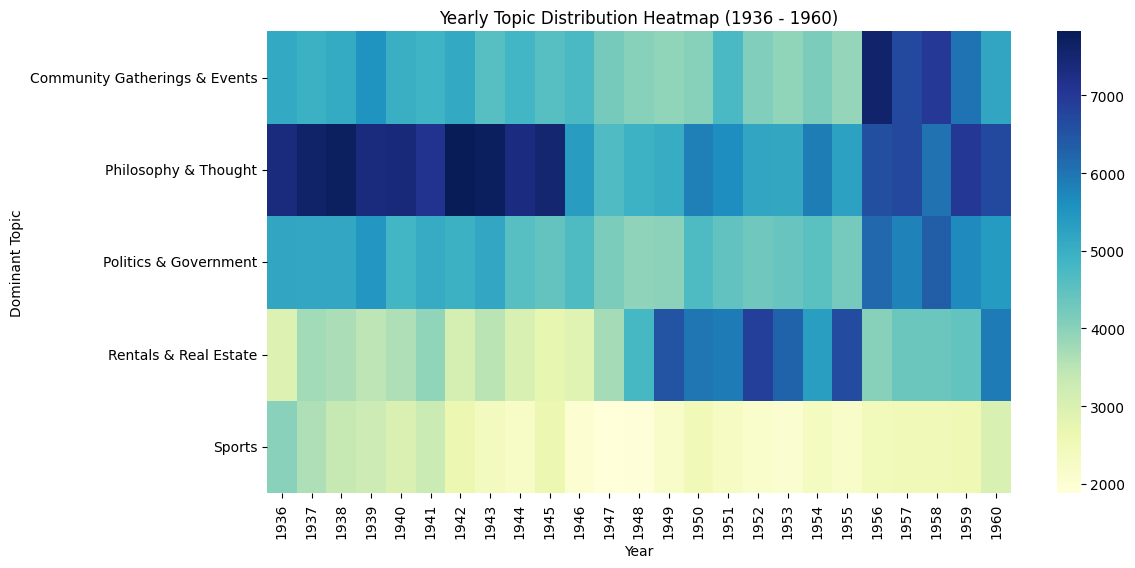

In [11]:
# Pivot data for heatmap
heatmap_data = topic_volume_pivot.T  # Transpose to have topics as rows and years as columns

# Creating the heatmap without annotations
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Yearly Topic Distribution Heatmap (1936 - 1960)")
plt.ylabel("Dominant Topic")
plt.xlabel("Year")
plt.show()

In [12]:
# Monthly topic distribution for a specific year

<Figure size 1200x600 with 0 Axes>

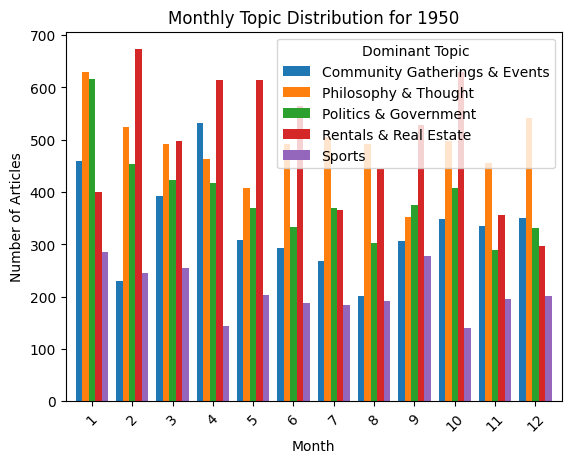

In [17]:
# Filter data for the year 1950
year_of_interest = 1950
monthly_distribution_1950 = df[df['year'] == year_of_interest].groupby(['month', 'dominant_topic']).size().reset_index(name='count')

# Pivot for easier plotting
monthly_pivot_1950 = monthly_distribution_1950.pivot(index='month', columns='dominant_topic', values='count').fillna(0)

plt.figure(figsize=(12, 6))
monthly_pivot_1950.plot(kind='bar', width=0.8)
plt.title("Monthly Topic Distribution for 1950")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.legend(title='Dominant Topic')
plt.show()

<ipython-input-18-1e98b270d6e0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topic_sum_over_years, x='dominant_topic', y='count', palette="viridis")


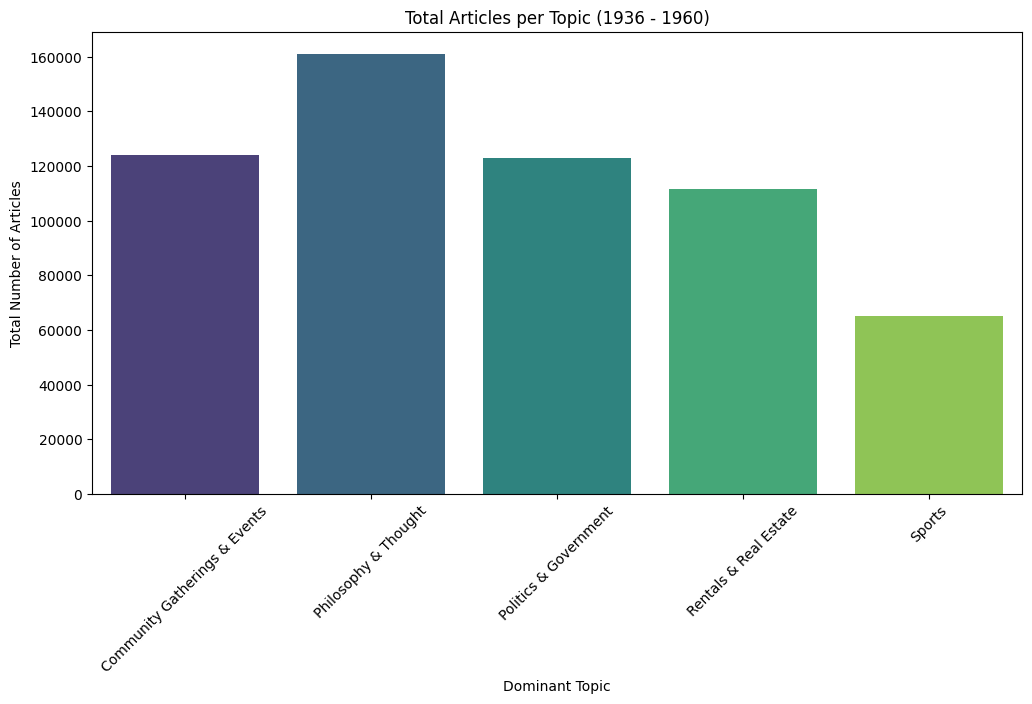

In [18]:
# Sum up all articles per topic across the years
topic_sum_over_years = topic_volume_by_year.groupby('dominant_topic')['count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=topic_sum_over_years, x='dominant_topic', y='count', palette="viridis")
plt.title("Total Articles per Topic (1936 - 1960)")
plt.xlabel("Dominant Topic")
plt.ylabel("Total Number of Articles")
plt.xticks(rotation=45)
plt.show()